# Astro 1102/1104: Section 2

###### V. Hunter Adams

In [1]:
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from matplotlib import animation, rc
from IPython.core.display import HTML 
from IPython.display import HTML
from ipywidgets import *
from scipy.integrate import odeint
from IPython.display import Image

## Seasons

**Each planet is doing two things: it is orbiting the Sun and it is spinning. The path that the planet takes about the Sun lies entirely in a plane (we could take a huge, flat piece of paper and, oriented properly, the planet would stay on the surface of that piece of paper). The axis about which the planet spins does *not necessarily* point directly off of the plane.**

**Let's assume for the moment that a planet is in a *circular* orbit (eccentricity is zero, foci on top of one another), and that the spin axis points directly out of the plane of orbit.** 

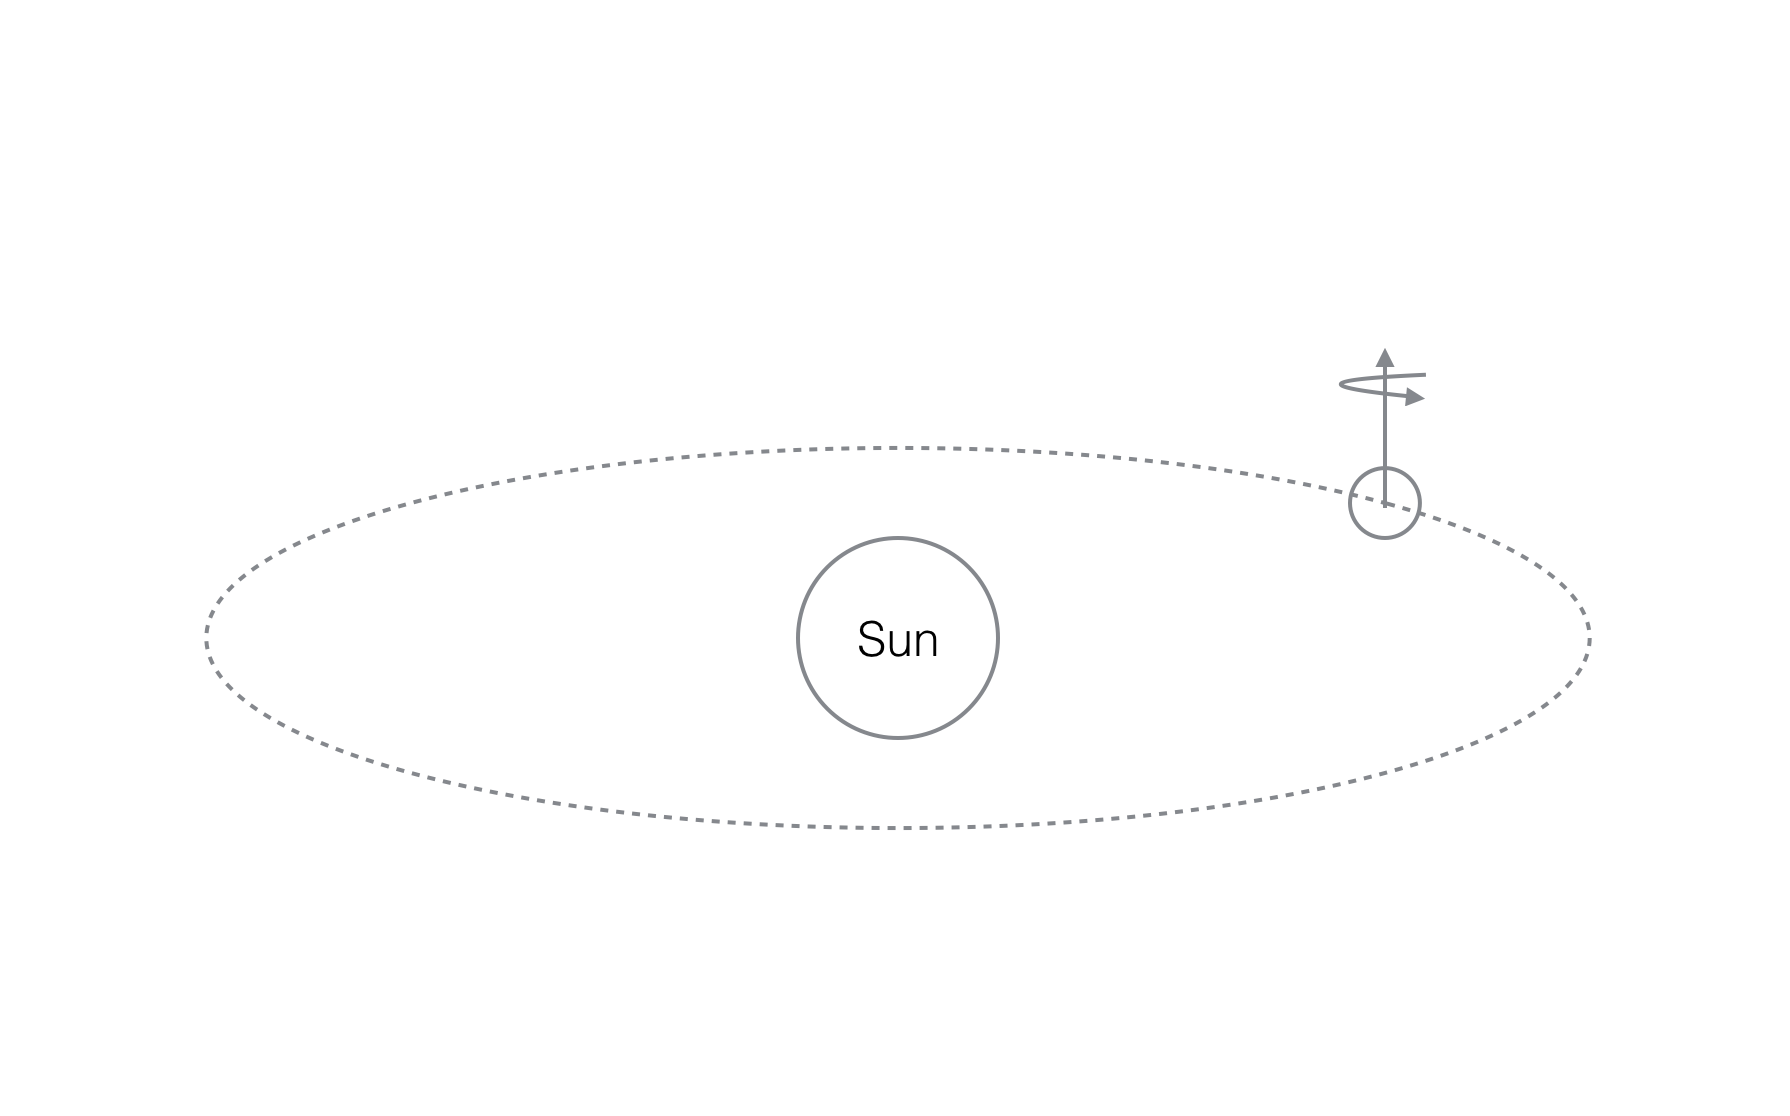

In [5]:
PATH = "/Users/hunteradams/Documents/PhD Semester 5/Sections/"
Image(filename = PATH + "flat.png", width=600, height=600)

*Question*: How does the length of a day change throughout the year for this planet?

*Answer*: It doesn't! Why? No matter where the planet is in its orbit, the Sun traverses the same path in the sky everyday. Remember that half of the Earth is always illuminated. So if the axis of rotation is not tilted, then for any day of the year the size of the illuminated part of the sphere that I spin through stays the same.

*Question*: Is there a particular time of the year that would be hotter/colder for any part of this planet than any other time?

*Answer*: No! For any latitude, the sunlight intensity is always the same. Thus, there are no seasons.

**Now let's assume that the spin axis *is* tilted relative to the orbital plane (i.e. the planet has some *obliquity*). How do the answers to the above questions change?**

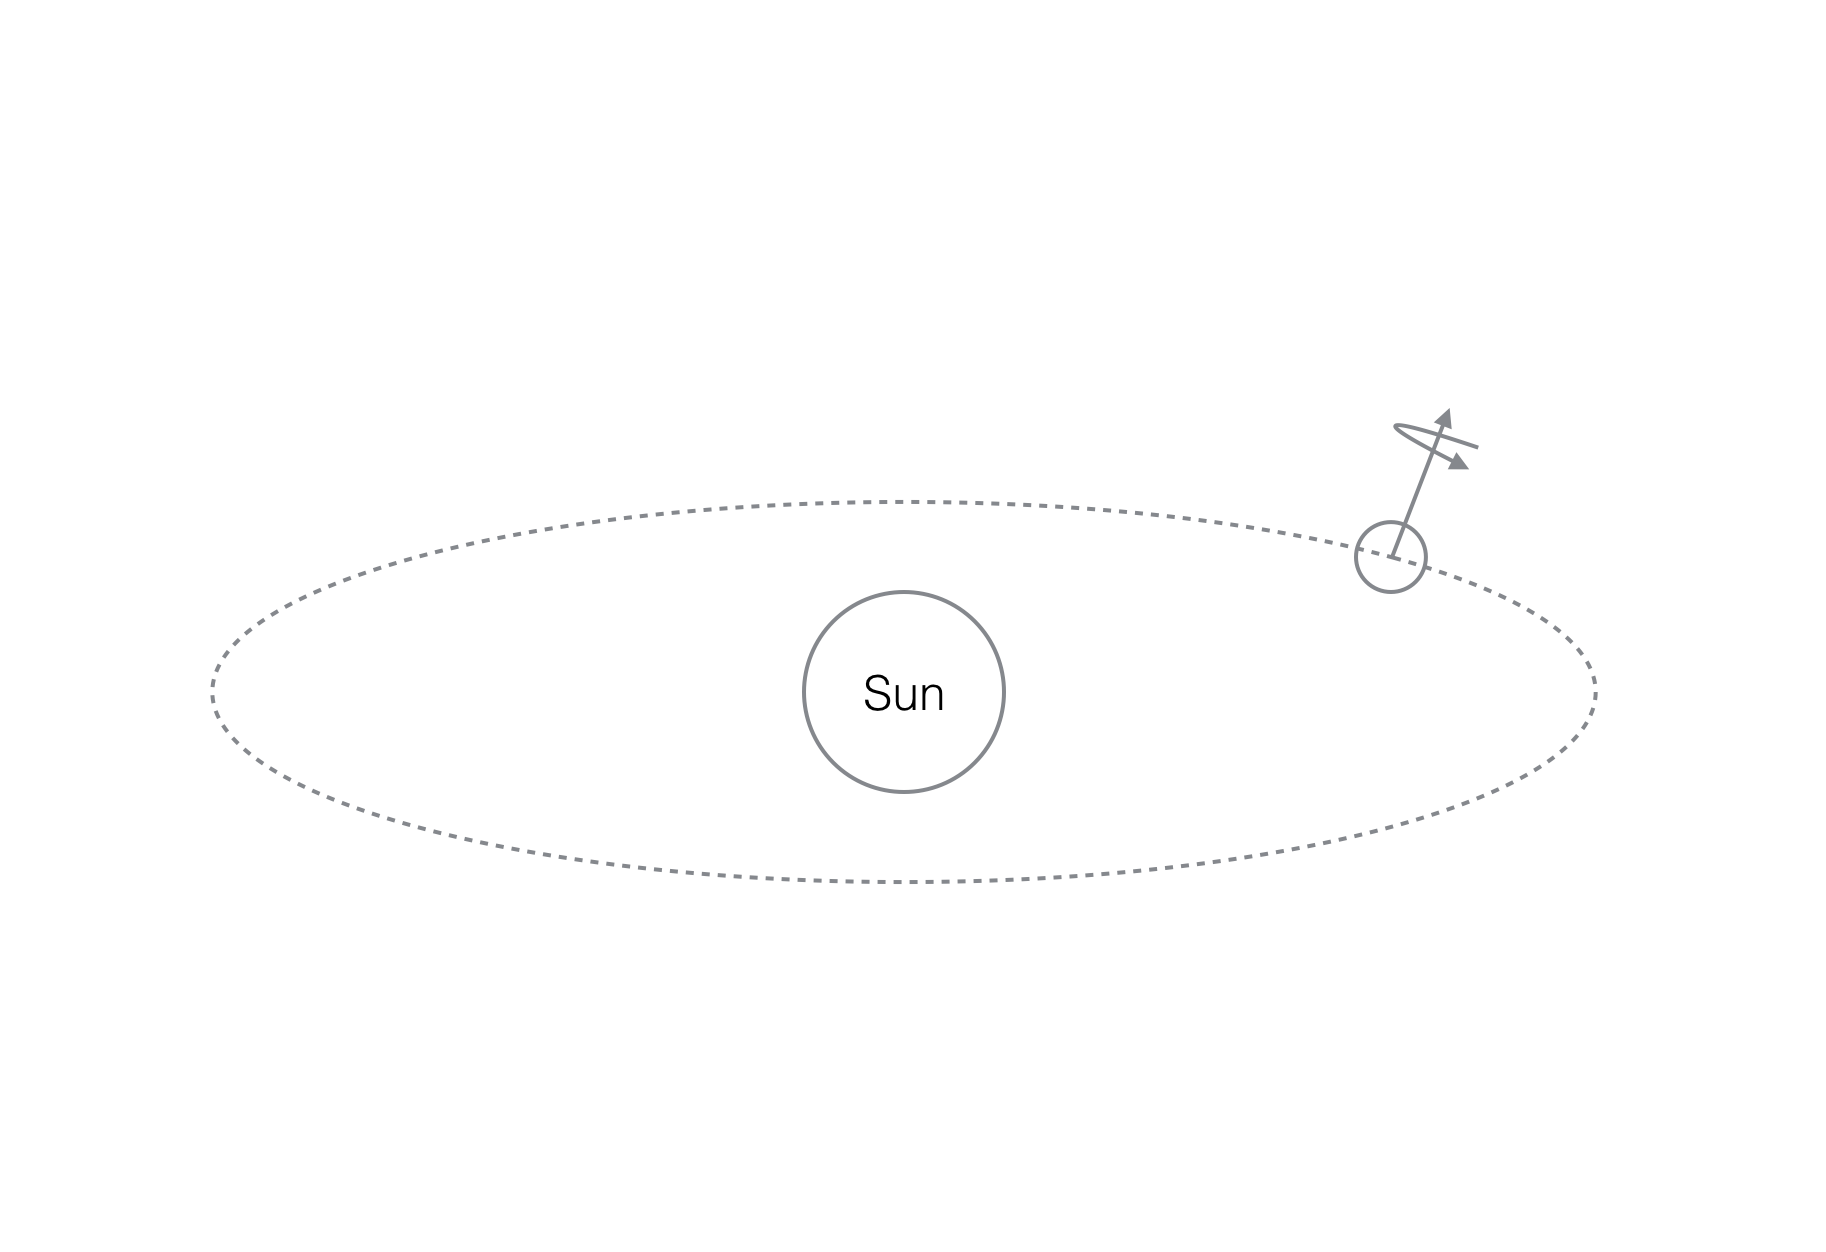

In [6]:
Image(filename = PATH + "tilt.png", width=600, height=600)

*Answer*: Depending which side of the Sun I'm on (and which part of the planet), the day is longer or shorter.

*Answer*: If I'm tilted toward the Sun, my days are longer and my sunlight is more direct (the sun is higher in my sky). So, part of the year will have longer, hotter days; and the other part will have shorter, colder days.

**A sidenote. Eccentricity can also affect this. What if the Earth's orbit were highly eccentric? We would then have seasons of different duration (Kepler's second law).**

*Question*: Why does the sun never set during an Arctic or Antarctic summer?

## Sidereal vs. Solar Days

Let's consider just the spinning Earth (forget about the Sun for a moment). When we're talking about sidereal time, we're considering the planet as an individual entity. If we're looking straight down on the North Pole, we'll see the Earth spinning counterclockwise. The *sidereal day* is the amount of time it takes for the Earth to complete one rotation ($2 \pi$ radians, 360 degrees).

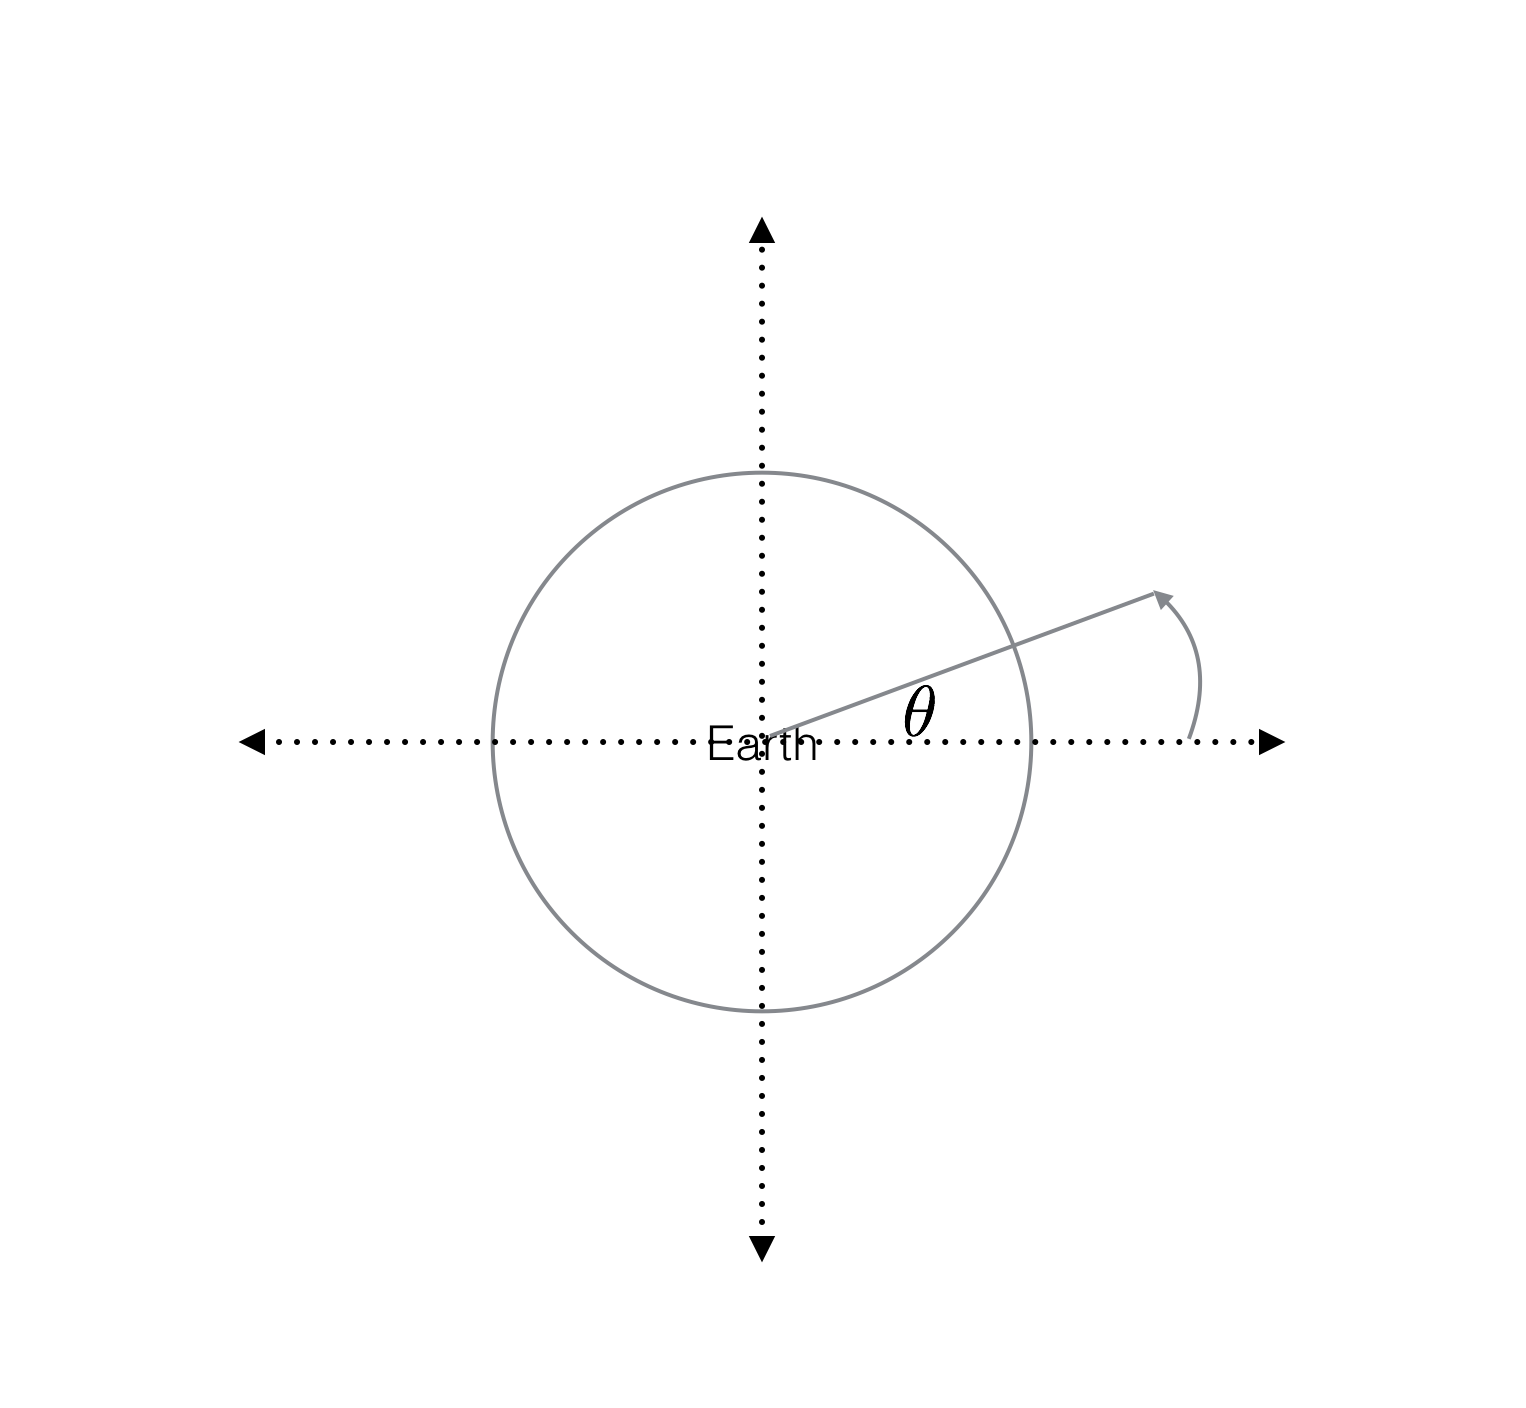

In [7]:
Image(filename = PATH + "earthspin.png", width=600, height=600)

Now let's bring the Sun into the picture. Suppose that instead of asking how long it takes for the Earth to spin 360 degrees, we instead asked how long it takes for the Sun to return to the same spot in the sky. If we're spinning in the same direction that we're orbiting, it's going to take longer than a sidereal day because the Earth will have moved relative to the Sun. What if we're spinning opposite the direction that we're rotating?

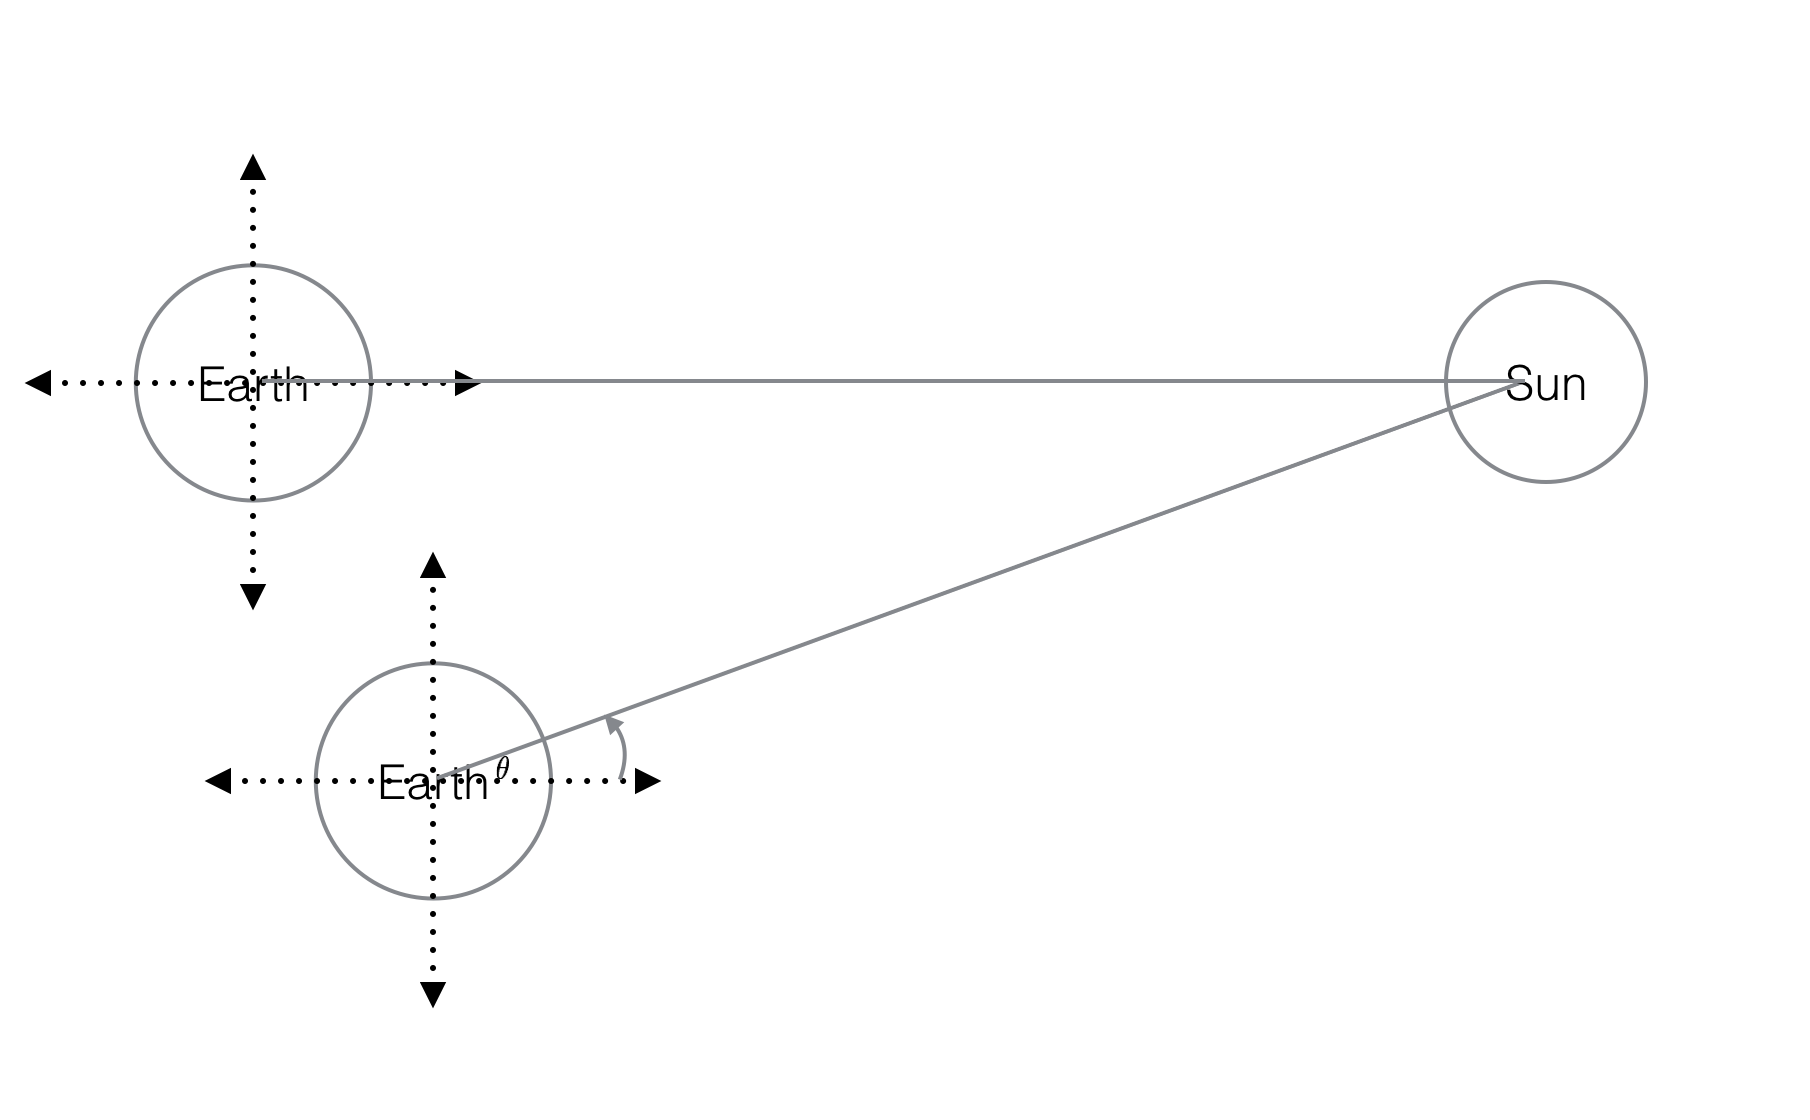

In [8]:
Image(filename = PATH + "earthsun.png", width=600, height=600)

## Moon Phases and Geometry

When you look at the Moon in the sky, you gather two pieces of information:
1. The phase of the Moon
2. The location of the Moon in the sky (South, North, East, West)

These two pieces of information can be used to tell approximately what time it is. The first piece of information (the phase of the Moon) defines the geometry of the Earth-Sun-Moon system. The second piece of information (location in sky) defines the time of the day/night. To understand this, we can draw a picture:

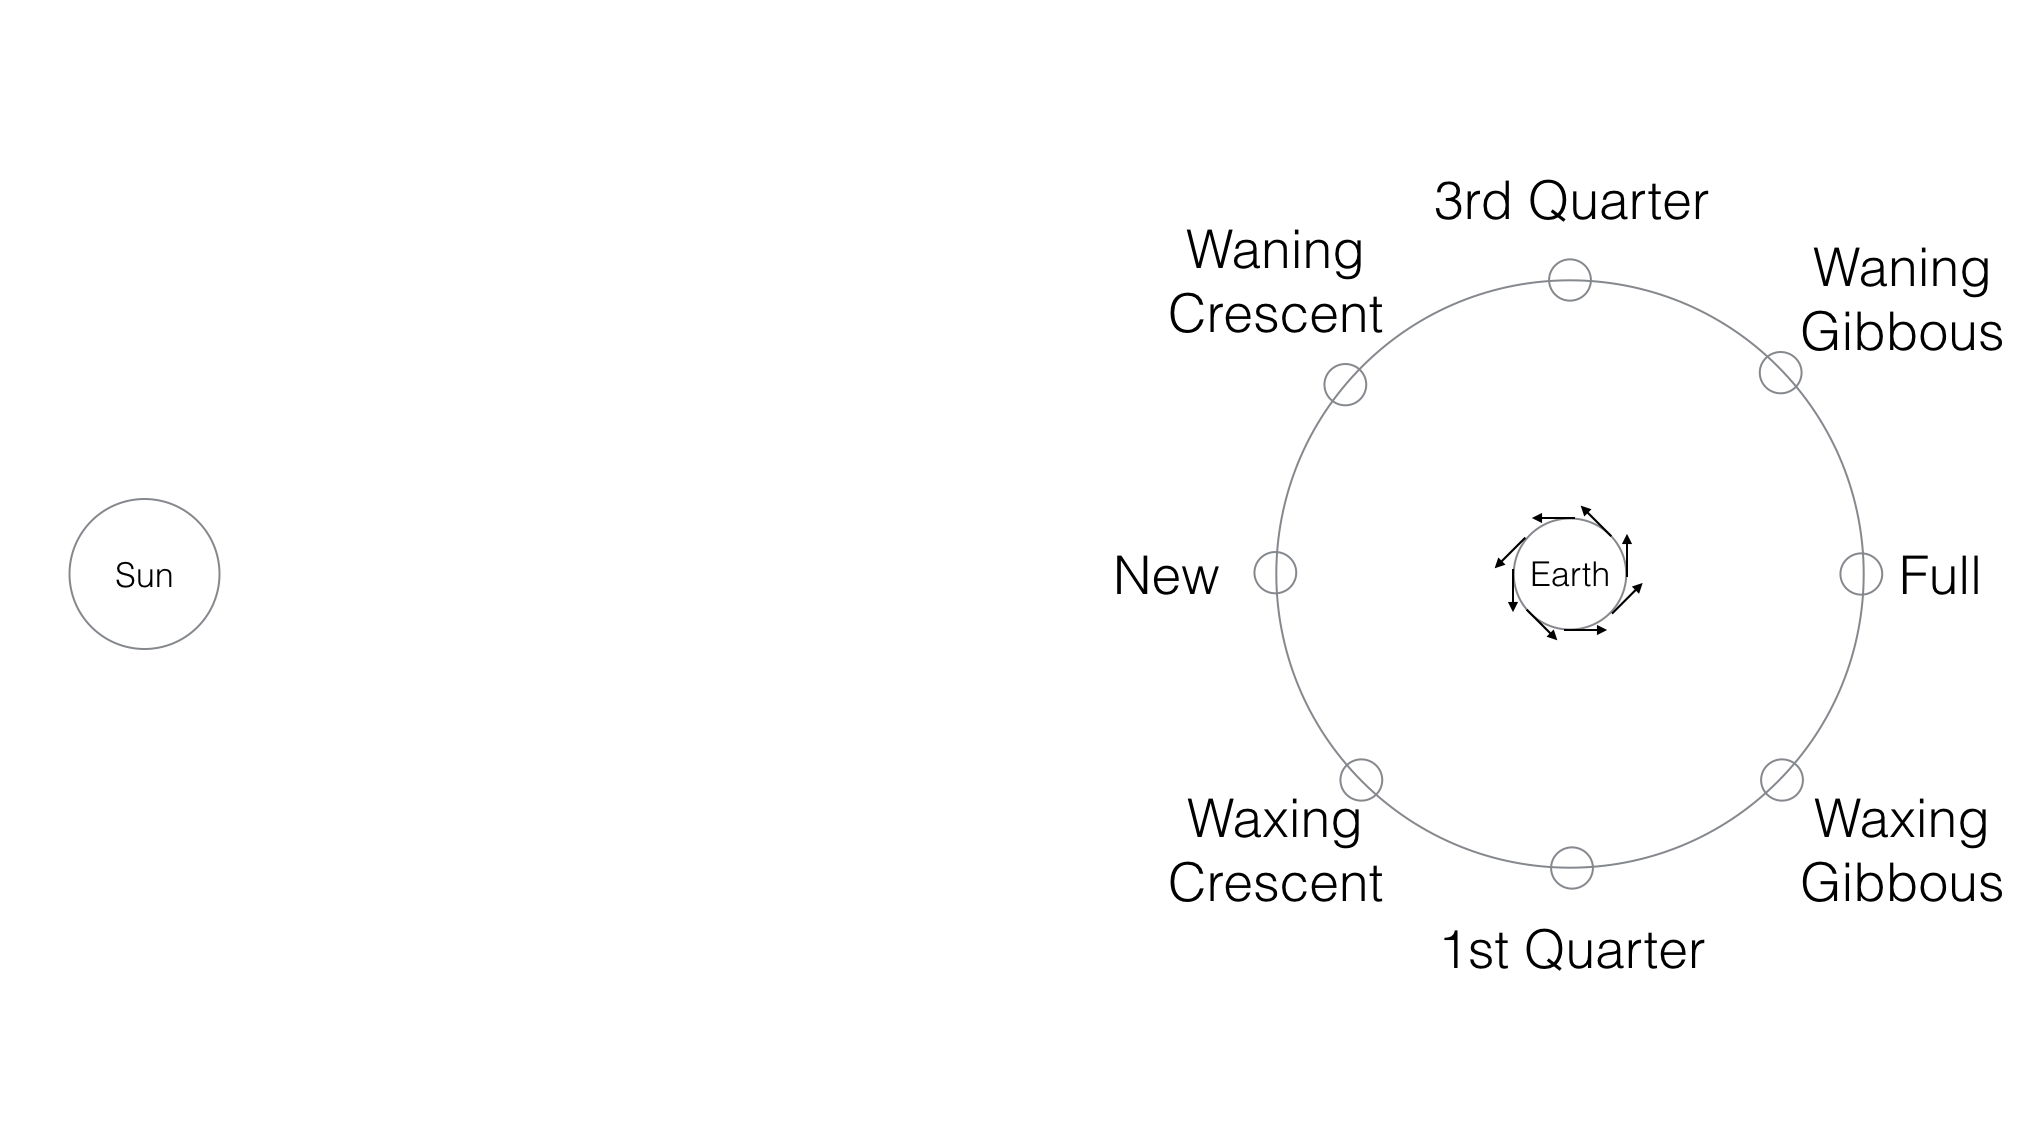

In [10]:
Image(filename = PATH + "geometry.png", width=600, height=600)

Consider this example:

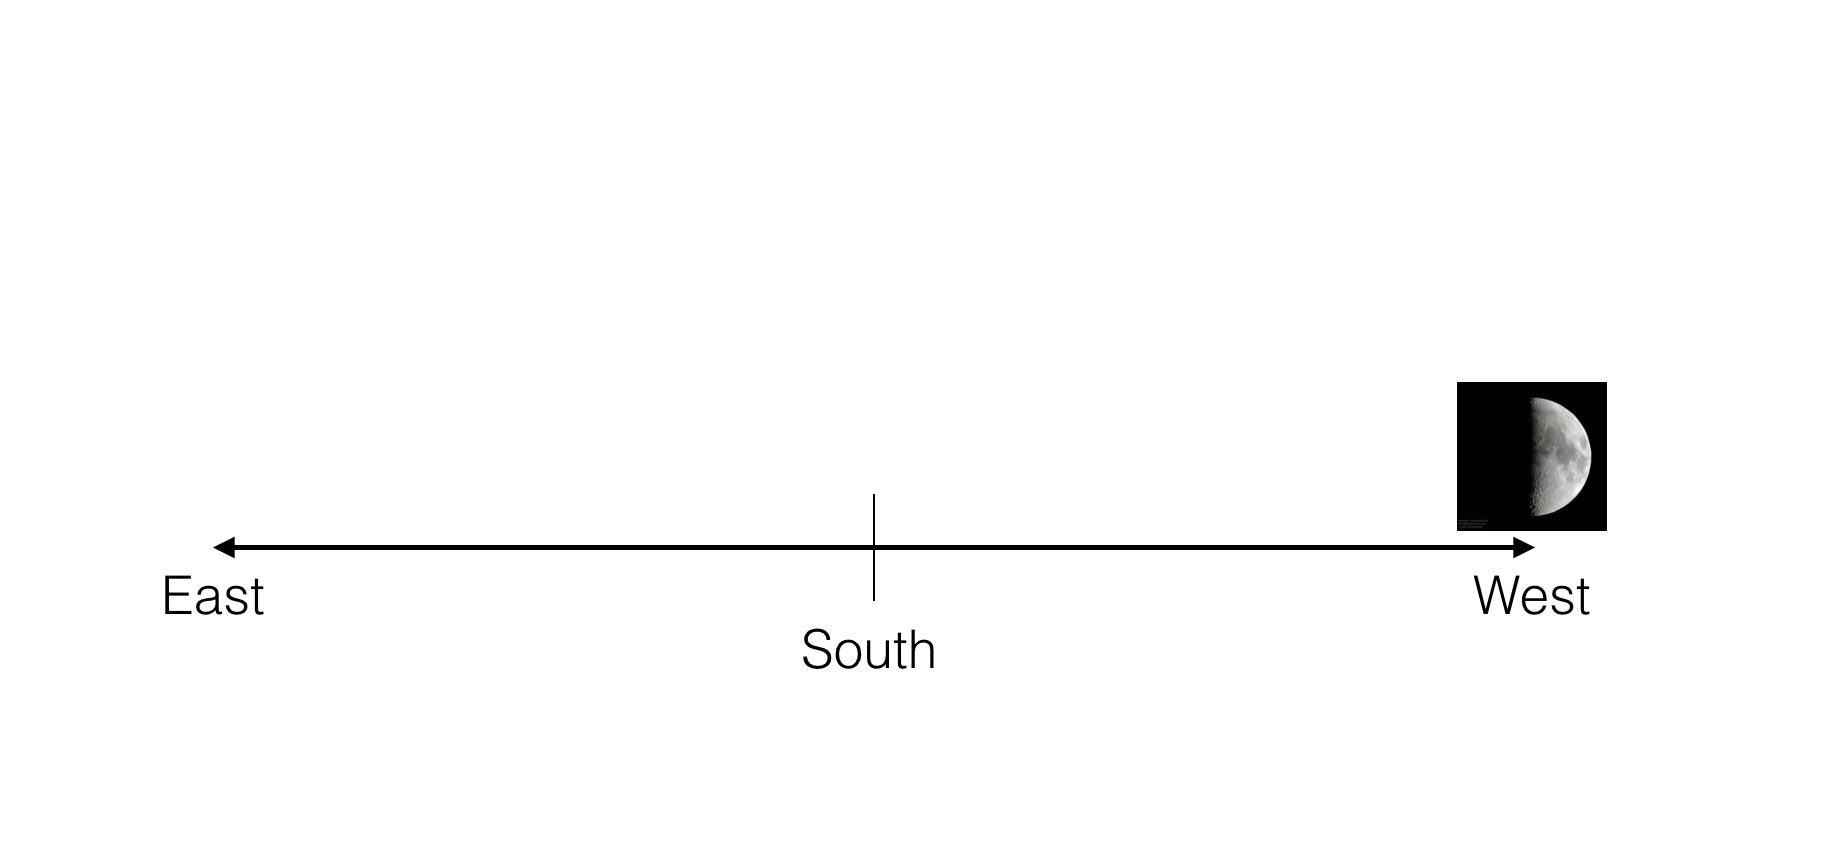

In [11]:
Image(filename = PATH + "example.png", width=600, height=600)

What time is it? Well, we have a first quarter moon. That tells us which geometry to choose. The fact that it's on the western horizon tells us that it's midnight.

## Tides

The fundamental idea behind tides is *differential force*. The relevant quantity to consider is the difference in gravitational forces felt in different locations on the Earth. The fact that gravitational force falls off as $\frac{1}{R^2}$ means that parts of the Earth closer to the Moon feel a stronger gravitational pull than parts that are farther from the Moon.

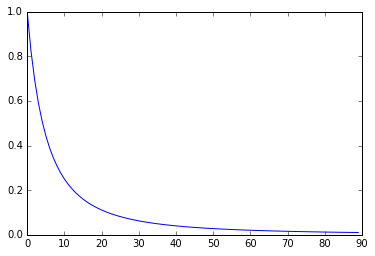

In [14]:
r = numpy.arange(1, 10, .1)
plt.plot(1./(r**2.));plt.show()

Consider the forces on the Earth exerted by the Moon. If we were to draw arrows to represent those forces (the direction gives us the direction of the force, the length gives us the strength of the force), we would get a picture that looks like this:

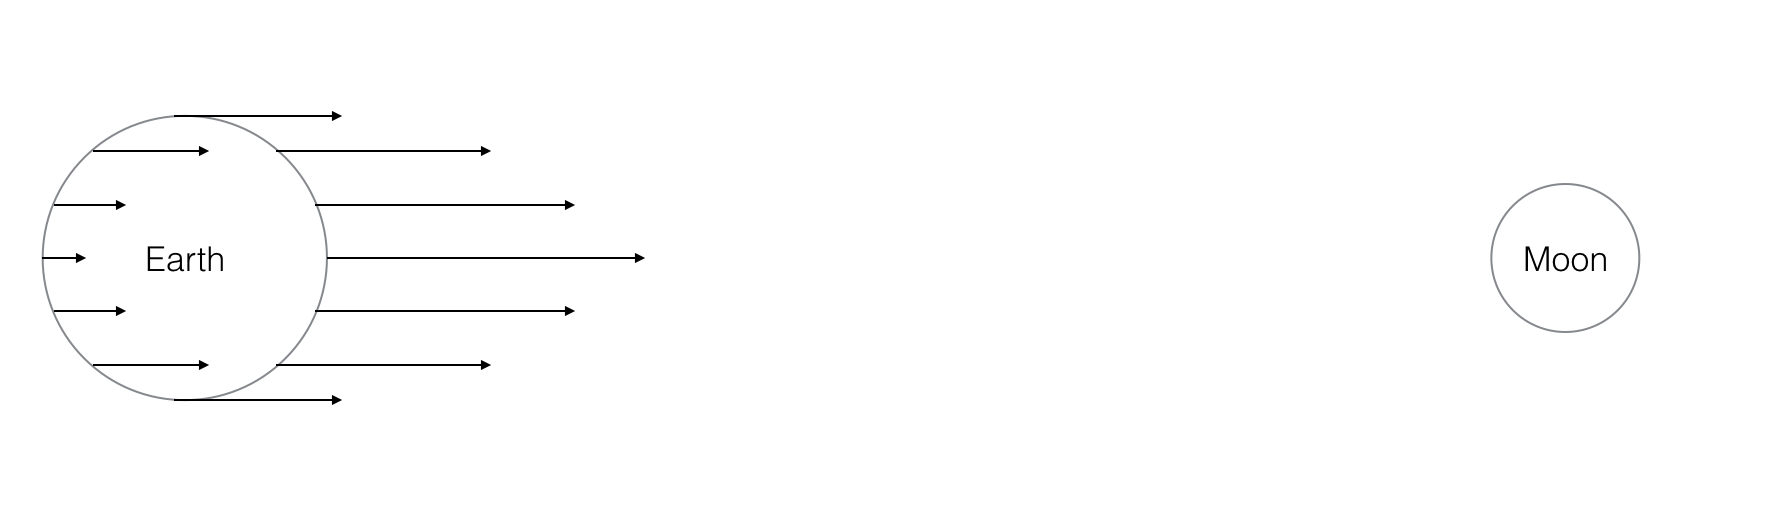

In [15]:
Image(filename = PATH + "tide.png", width=600, height=600)

If the Earth were squishy, what would happen to it? It's easier to answer this if we instead think about *differential forces*. Let's consider the average force acting on the center of the Earth:

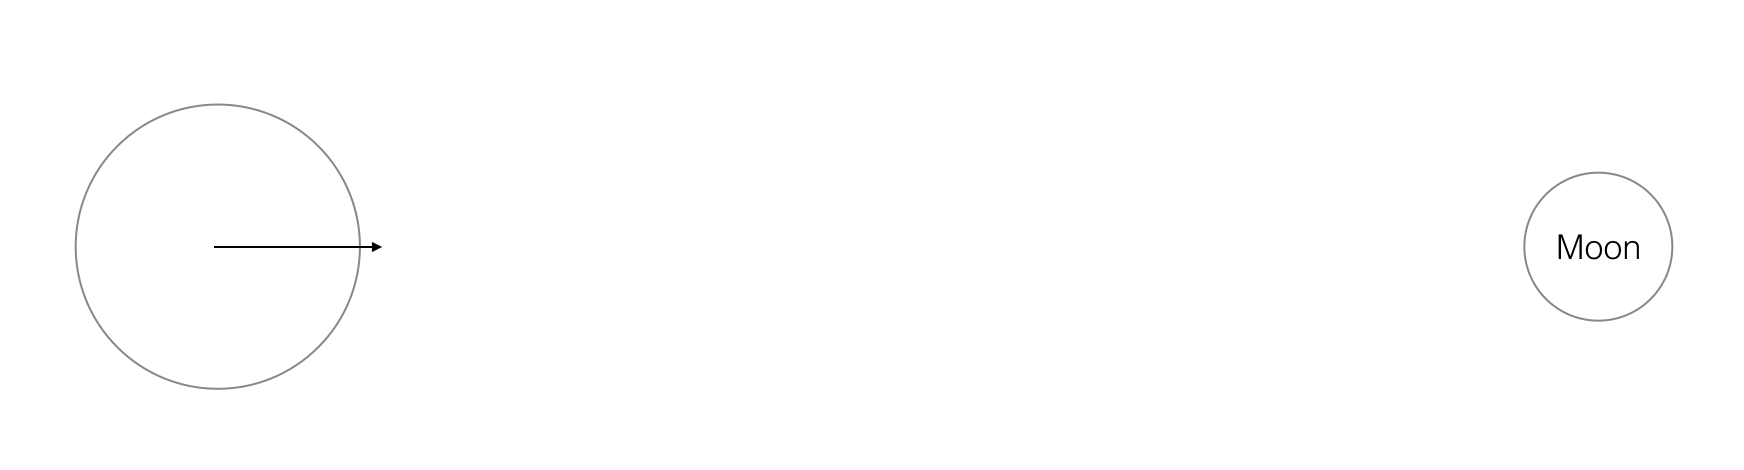

In [16]:
Image(filename = PATH + "ave.png", width=600, height=600)

Now, what is the difference between the forces acting on each part of the Earth and the average force? (Force acting on particular part of the Earth - average)?

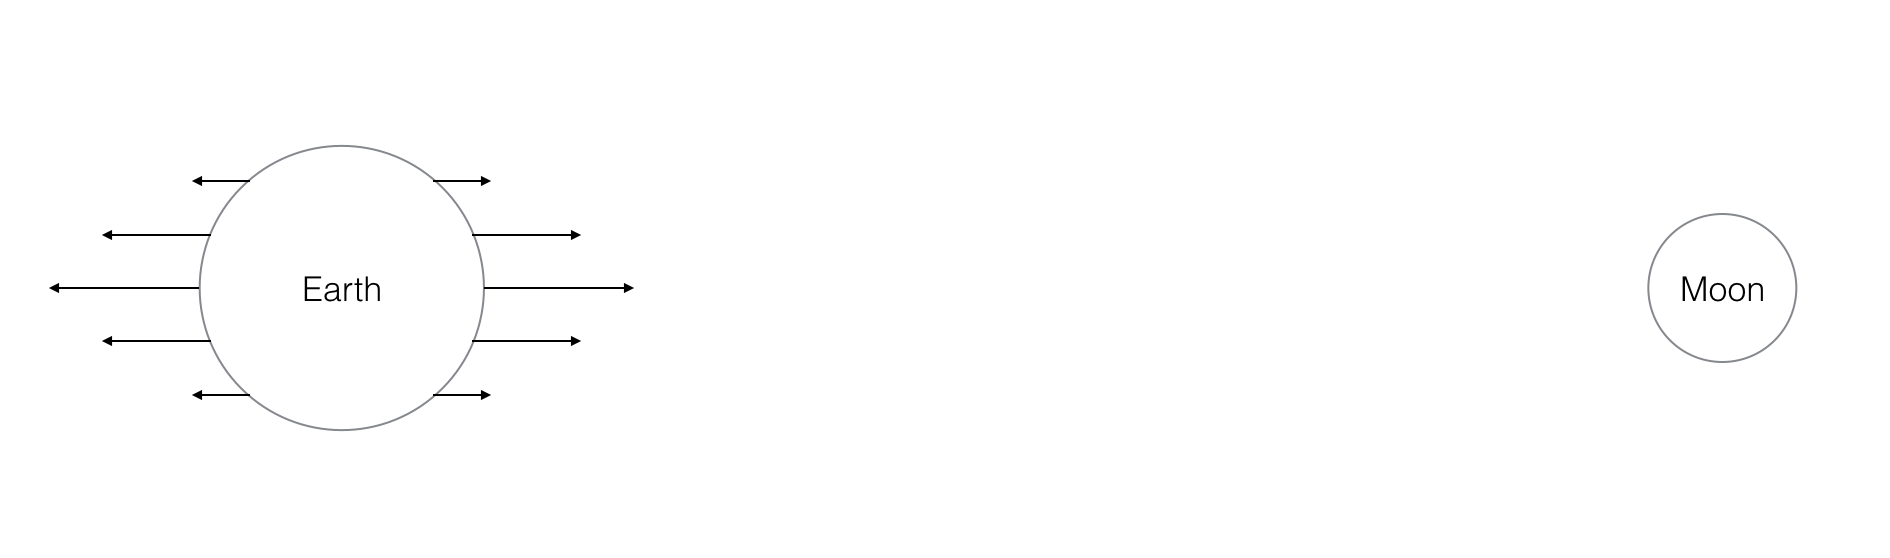

In [17]:
Image(filename = PATH + "diff.png", width=600, height=600)

Relative to the center of the Earth, the Earth is stretched. This stretching creates a bulge of water on either side of the Earth, underneath of which the Earth rotates. When you rotate into a bulge, you have high tide. When you rotate out of a bulge, you have low tide. This is why there are two high tides and two low tides each day.

**Based on this, why is it that the Moon has a much greater influence on the tides than the Sun?**

**What would happen if you were falling into a black hole?**

## Kepler's Third Law

The relevant equation:

\begin{align}
P^{2} = a^{3}\frac{4 \pi^2}{G\left(M + m\right)} \approx a^{3}\frac{4 \pi^2}{GM}
\end{align}

The above equation is true in any set of consistent unites (SI, cgs). You'll be working largely in SI units (kg, meters, seconds). **Key tip: put everything into consistent units.**

#### An Example

The International Space Station orbits with a period of 1.5 hours. How far above the surface of the Earth is it orbiting (assuming that its orbit is about circular).

We're going to use Kepler's Third Law:

\begin{align}
P^2 \approx a^3\frac{4\pi^2}{GM}
\end{align}

Here are the known, constant quantities:

\begin{align}
G &= 6.67 \times 10^{-11} \frac{m^{3}}{kg\cdot sec^2}\\
M &= 5.97 \times 10^{24} kg\\
\pi &= 3.14\\
R_{Earth} &= 6.37 \times 10^{6} m
\end{align}

We are told that the orbital period (P) of the ISS is 1.5 hours. But! We need to convert that to seconds:

\begin{align}
P &= \frac{1.5 hours}{1} \cdot \frac{60 min}{1 hour} \cdot \frac{60 sec}{1 min}\\
&= 5400 seconds
\end{align}

So we now have everything in the above equation except the variable that we're interested in: $a$ (the semi-major axis). Let's rearrange the equation to solve for $a$:

\begin{align}
P^2 &\approx a^3\frac{4\pi^2}{GM}\\
G\cdot M \cdot P^2 &\approx a^3 \cdot 4 \cdot \pi^2\\
\frac{G\cdot M \cdot P^2}{4 \cdot \pi^2} &\approx a^3
\end{align}

How do we get rid of that exponent? We raise each side of the equation to the $\frac{1}{3}$ power.

\begin{align}
a \approx \left(\frac{GMP^2}{4\pi^2}\right)^{\frac{1}{3}}
\end{align}

Ok, now substitute and solve:

\begin{align}
a &\approx \left(\frac{\left(6.67\times10^{-11}\right)\left(5.97\times 10^{24}\right)\left(5400\right)^{2}}{4\pi^2}\right)^{\frac{1}{3}}\\
&\approx 6.65 \times 10^{6} m
\end{align}

But wait! That's the distance from the center of the Earth. How far above the surface of the Earth is that?

\begin{align}
distance &= a-R_{Earth}\\
&= 6.65\times 10^{6} - 6.37\times 10^{6}\\
&= 2.8 \times 10^{5} meters
\end{align}

How many kilometers is this?

\begin{align}
distance &= \frac{2.8\times 10^{5}meters}{1}\cdot \frac{1km}{1000m}\\
&= 280 km
\end{align}

**MAKE IT A HABIT TO STOP FOR A MOMENT AND ASK: DOES THIS MAKE SENSE?** If I had gotten 3 centimeters as an answer, I should realize that I've made a mistake. In this case, we've gotten the correct answer.